In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.linear_model import LinearRegression

In [60]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")

In [61]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [62]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [64]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [65]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [66]:
# This means that we dont have any null values

In [67]:
df.duplicated().sum()

0

In [68]:
#This means there are no duplicate rows

In [69]:
duplicated = df.duplicated(subset=['Country','Region'])

In [70]:
duplicated

0      False
1      False
2      False
3      False
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Length: 158, dtype: bool

In [71]:
#This means there are no duplicates in either country or region

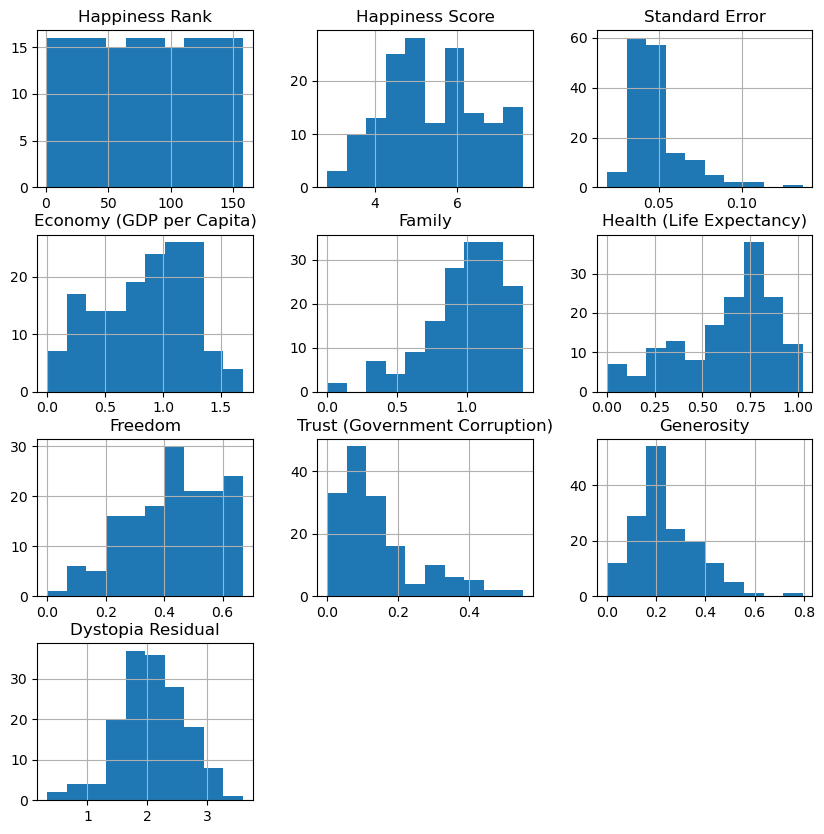

In [72]:
df.hist(bins = 10,figsize=(10,10))
plt.show()

In [73]:
# This means that Standard Error ,Trust (Government Corruption) and Generosity  right skewed
# and Family and Freedom are left skewed

In [74]:
# Dystopia Residual, Happiness Score and Economy (GDP per Capita) is normally distributed

In [75]:
# There are some outliers as well in Generosity , Family and Standard Error

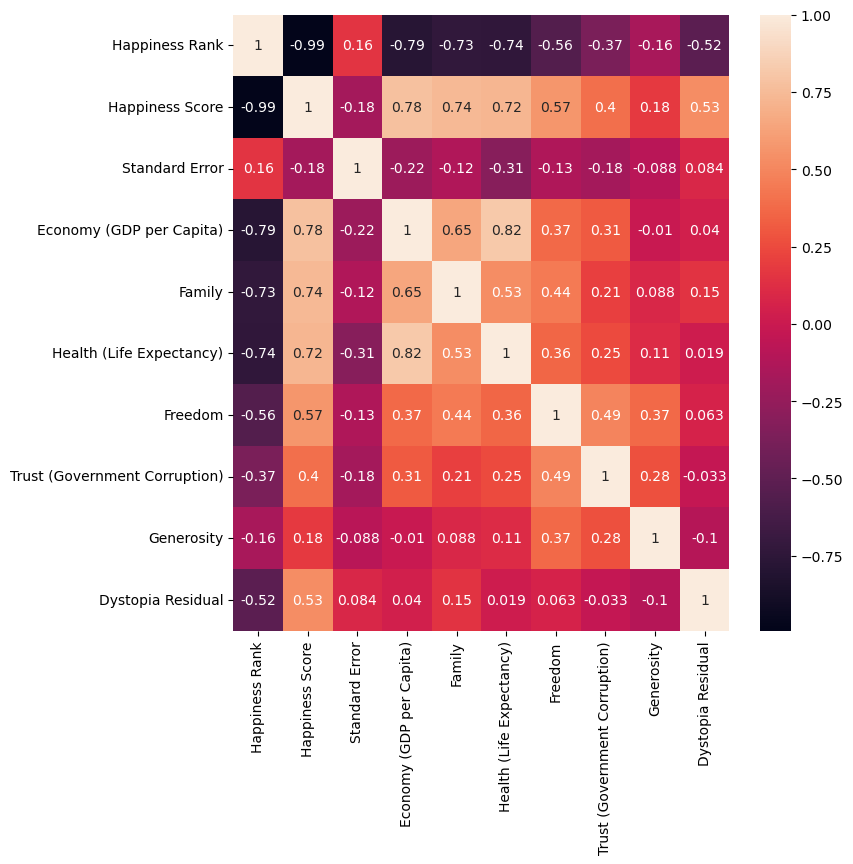

In [76]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True,)
plt.show()

In [77]:
# This means that there is strong correlation between the variables such as Economy (GDP per Capita),Family and Health (Life Expectancy)
# So we will drop the columns with less correlation

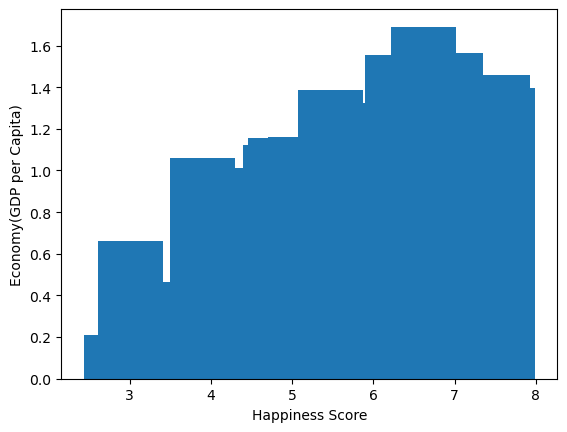

In [78]:
plt.bar(df['Happiness Score'],df['Economy (GDP per Capita)'])
plt.xlabel('Happiness Score')
plt.ylabel('Economy(GDP per Capita)')
plt.show()

In [79]:
# It is clearly visible that the countries with high happiness score have high GDP

In [80]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [87]:
df_1 = df.drop(['Country','Region','Happiness Rank',],axis=1)

In [89]:
df_1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [90]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Score                158 non-null    float64
 1   Standard Error                 158 non-null    float64
 2   Economy (GDP per Capita)       158 non-null    float64
 3   Family                         158 non-null    float64
 4   Health (Life Expectancy)       158 non-null    float64
 5   Freedom                        158 non-null    float64
 6   Trust (Government Corruption)  158 non-null    float64
 7   Generosity                     158 non-null    float64
 8   Dystopia Residual              158 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df_1)
scaled_data=scaler.transform(df_1)
scaled_data

array([[ 1.93736005, -0.80592569,  1.36962124, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 1.91458063,  0.05588945,  1.13522625, ..., -0.01647953,
         1.57585637,  1.09285682],
       [ 1.88479215, -0.8544869 ,  1.19286069, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [-2.0761992 ,  0.13253425, -0.45524543, ...,  0.38141902,
         1.85689094, -3.20843049],
       [-2.1646885 ,  2.26396166, -2.06756644, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [-2.22251319,  1.13418227, -1.58633379, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [92]:
x = df_1.drop(['Happiness Score','Health (Life Expectancy)'],axis=1)

In [93]:
x

,Standard Error,Economy (GDP per Capita),Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.03464,0.22208,0.77370,0.59201,0.55191,0.22628,0.67042
154,0.03656,0.28665,0.35386,0.48450,0.08010,0.18260,1.63328
155,0.05015,0.66320,0.47489,0.15684,0.18906,0.47179,0.32858
156,0.08658,0.01530,0.41587,0.11850,0.10062,0.19727,1.83302


In [94]:
y = df_1['Happiness Score']

In [95]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
coefficient = lr.coef_
df_coefficient = pd.DataFrame(list(zip(x.columns,coefficient)),columns=['Feature','Coefficients'])
df_coefficient

,Feature,Coefficients
0,Standard Error,-1.611845
1,Economy (GDP per Capita),1.470635
2,Family,0.982888
3,Freedom,1.143044
4,Trust (Government Corruption),0.872382
5,Generosity,1.168830
6,Dystopia Residual,1.004832


In [100]:
y_pred = lr.predict(x_test)

In [101]:
y_pred

array([4.28091252, 5.82010302, 4.20136098, 2.81851737, 4.93366329,
       6.50462764, 5.12995769, 4.84945512, 4.71830565, 3.94585307,
       7.01363041, 5.6023493 , 6.97986486, 5.66970029, 6.74239896,
       6.45234517, 4.85907164, 4.72033928, 5.08631936, 5.56614455,
       3.94238877, 6.91149212, 7.22084259, 7.25522308, 6.41597788,
       5.12828103, 5.79829911, 3.89154195, 4.3744923 , 3.53484471,
       3.76972265, 5.29601769, 4.11505639, 5.83440404, 4.1678538 ,
       5.25359691, 3.41985057, 6.08868457, 5.60316233, 4.57065372])

In [114]:
y_pred_1 = pd.DataFrame(y_pred,columns=['Predicted'])

In [115]:
y_pred_1

,Predicted
0,4.280913
1,5.820103
2,4.201361
3,2.818517
4,4.933663
5,6.504628
6,5.129958
7,4.849455
8,4.718306
9,3.945853


In [119]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as mse

In [123]:
print("Root Mean Squared:" , np.sqrt(mse(y_test,y_pred_1)) , mse)

Root Mean Squared: 0.12265826470008372 <function mean_squared_error at 0x000002DB8F7B7640>


In [124]:
# The model has rmse score of ~0.12 as lower the rmse score better is the model

In [125]:
from sklearn.metrics import r2_score, mean_absolute_error

In [126]:
mae = mean_absolute_error(y_test,y_pred_1)
print("Mean Absolute Error:" , mae)

Mean Absolute Error: 0.08969324059583186


In [129]:
# The model has mean absolute score of ~0.0896 as lower the mean absolute error score better is the model

In [127]:
r2 = r2_score(y_test,y_pred_1)
print("R2 Score:" , r2)

R2 Score: 0.9886953890087467


In [128]:
# The model has r2 score of ~0.98 as higher the r2 score better is the model 

In [130]:
#Conclusion : The model has rmse score of ~0.12 as lower the rmse score better is the model
#The model has mean absolute score of ~0.0896 as lower the mean absolute error score better is the model
#The model has r2 score of ~0.98 as higher the r2 score better is the model and Therefore it has been seen that Economy(GDP per Capita),
#Freedom, Generosity and dystopia residual are the most important features